# <a id='toc1_'></a>[Rozdział 10. Macierze rzadkie i grafy](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [Rozdział 10. Macierze rzadkie i grafy](#toc1_)    
  - [Format listy współrzędnych - COO](#toc1_1_)    
  - [CSR](#toc1_2_)    
  - [Funkcje do tworzenia macierzy rzadkich](#toc1_3_)    
  - [Alebra liniowa macierzy rzadkich](#toc1_4_)    
    - [Przykład permutacji macierzy odwrotnym algorytmem Cuthilla-McKee'a](#toc1_4_1_)    
    - [Problem wartości własnych](#toc1_4_2_)    
  - [Grafy](#toc1_5_)    
    - [Graf tokijskiego metra](#toc1_5_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

**Libraries:**

- [NumPy](https://numpy.org/)
- [SymPy](https://www.sympy.org/en/index.html)
- [Matplotlib](https://matplotlib.org/)
- [SciPy](https://scipy.org/)
- [NetworkX](https://networkx.org/documentation/stable/reference/index.html)

In [8]:
import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np

import scipy.sparse as sp
import scipy.sparse.linalg
import scipy.linalg as la

import networkx as nx

## <a id='toc1_1_'></a>[Format listy współrzędnych - COO](#toc0_)

In [2]:
values = [1, 2, 3, 4]
rows = [0, 1, 2, 3]
cols = [1, 3, 2, 0]

A = sp.coo_matrix((values, (rows, cols)), shape=[4, 4])
A.todense()

matrix([[0, 1, 0, 0],
        [0, 0, 0, 2],
        [0, 0, 3, 0],
        [4, 0, 0, 0]])

In [4]:
A

<4x4 sparse matrix of type '<class 'numpy.int32'>'
	with 4 stored elements in COOrdinate format>

In [5]:
A.shape, A.size, A.dtype, A.ndim

((4, 4), 4, dtype('int32'), 2)

In [6]:
A.nnz, A.data

(4, array([1, 2, 3, 4]))

In [7]:
A.row

array([0, 1, 2, 3])

In [8]:
A.col

array([1, 3, 2, 0])

In [9]:
A.tocsr()

<4x4 sparse matrix of type '<class 'numpy.intc'>'
	with 4 stored elements in Compressed Sparse Row format>

In [10]:
A.toarray()

array([[0, 1, 0, 0],
       [0, 0, 0, 2],
       [0, 0, 3, 0],
       [4, 0, 0, 0]])

In [11]:
A.todense()

matrix([[0, 1, 0, 0],
        [0, 0, 0, 2],
        [0, 0, 3, 0],
        [4, 0, 0, 0]])

## <a id='toc1_2_'></a>[CSR](#toc0_)

In [12]:
A = np.array([[1, 2, 0, 0], [0, 3, 4, 0], [0, 0, 5, 6], [7, 0, 8, 9]]); 
A

array([[1, 2, 0, 0],
       [0, 3, 4, 0],
       [0, 0, 5, 6],
       [7, 0, 8, 9]])

In [13]:
A = sp.csr_matrix(A)

In [17]:
A.data

array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [18]:
A.indices

array([0, 1, 1, 2, 2, 3, 0, 2, 3])

In [19]:
A.indptr

array([0, 2, 4, 6, 9])

## <a id='toc1_3_'></a>[Funkcje do tworzenia macierzy rzadkich](#toc0_)

In [20]:
N = 10
A = -2 * sp.eye(N) + sp.eye(N, k=1) + sp.eye(N, k=-1)
A

<10x10 sparse matrix of type '<class 'numpy.float64'>'
	with 28 stored elements (3 diagonals) in DIAgonal format>

In [21]:
A.todense()

matrix([[-2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1., -2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  1., -2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  1., -2.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1., -2.,  1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1., -2.,  1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  1., -2.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  1., -2.,  1.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -2.,  1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -2.]])

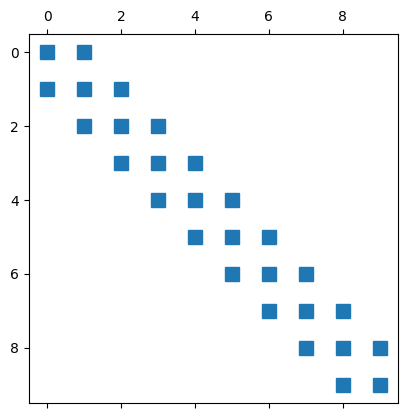

In [22]:
fig, ax = plt.subplots()
ax.spy(A);

In [37]:
A = sp.diags([1,-2,1], [1,0,-1], shape=[N, N], format='csc')
A

<10x10 sparse matrix of type '<class 'numpy.float64'>'
	with 28 stored elements in Compressed Sparse Column format>

In [38]:
B = sp.diags([1, 1], [-1, 1], shape=[3,3])
B

<3x3 sparse matrix of type '<class 'numpy.float64'>'
	with 4 stored elements (2 diagonals) in DIAgonal format>

In [39]:
C = sp.kron(A, B, format='csr')
C

<30x30 sparse matrix of type '<class 'numpy.float64'>'
	with 112 stored elements in Compressed Sparse Row format>

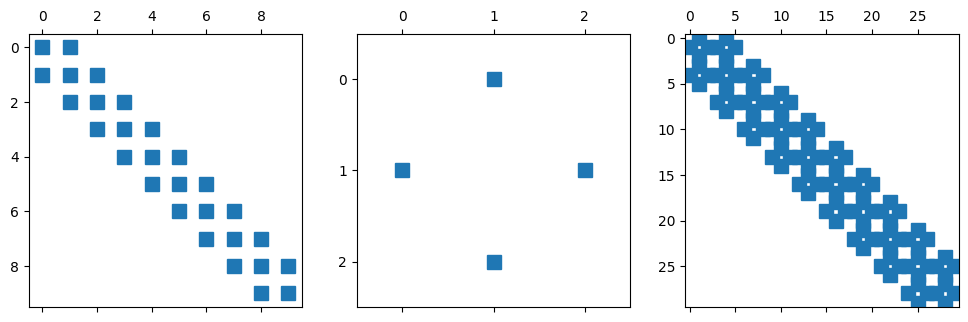

In [41]:
fig, (ax_A, ax_B, ax_C) = plt.subplots(1, 3, figsize=(12, 4))
ax_A.spy(A)
ax_B.spy(B)
ax_C.spy(C);

## <a id='toc1_4_'></a>[Alebra liniowa macierzy rzadkich](#toc0_)

In [184]:
N = 10
A = sp.diags([1, -2, 1], [1, 0, -1], shape=[N, N], format='csc')
b = -np.ones(N)

# Solve the system of sparse linear equations
x = sp.linalg.spsolve(A, b)
x

array([ 5.,  9., 12., 14., 15., 15., 14., 12.,  9.,  5.])

In [185]:
# LU decomposition
lu = sp.linalg.splu(A)

In [187]:
lu.L

<10x10 sparse matrix of type '<class 'numpy.float64'>'
	with 20 stored elements in Compressed Sparse Column format>

In [188]:
lu.perm_r

array([0, 1, 2, 3, 4, 5, 6, 8, 7, 9], dtype=int32)

In [189]:
lu.U

<10x10 sparse matrix of type '<class 'numpy.float64'>'
	with 20 stored elements in Compressed Sparse Column format>

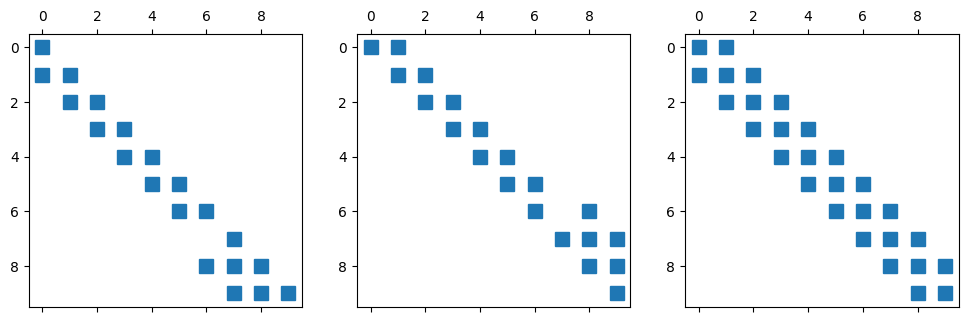

In [190]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
ax1.spy(lu.L)
ax2.spy(lu.U)
ax3.spy(A);

In [191]:
# Solve the system of sparse linear equations using the LU decomposition
x = lu.solve(b)
x

array([ 5.,  9., 12., 14., 15., 15., 14., 12.,  9.,  5.])

In [192]:
# Solve the system of sparse linear equations using the conjugate gradient method
x, info = sp.linalg.cg(A, b)
x, info

(array([ 5.,  9., 12., 14., 15., 15., 14., 12.,  9.,  5.]), 0)

In [193]:
# Solve the system of sparse linear equations using the BiCGStab method
x, info = sp.linalg.bicgstab(A, b)
x, info

(array([ 5.,  9., 12., 14., 15., 15., 14., 12.,  9.,  5.]), 0)

In [194]:
# Solve the system of sparse linear equations using the GMRES method
x, info = sp.linalg.lgmres(A, b, atol=1e-5)
x, info

(array([ 5.,  9., 12., 14., 15., 15., 14., 12.,  9.,  5.]), 0)

### <a id='toc1_4_1_'></a>[Przykład permutacji macierzy odwrotnym algorytmem Cuthilla-McKee'a](#toc0_)

In [195]:
N = 25
A = sp.diags([1, -2, 1], [8, 0, -8], shape=[N, N], format='csc')

In [196]:
perm = sp.csgraph.reverse_cuthill_mckee(A)
M, N = A.shape
P = sp.coo_matrix((np.ones(M), (perm, np.arange(N)))).tocsr()
A_perm = P.T * A * P

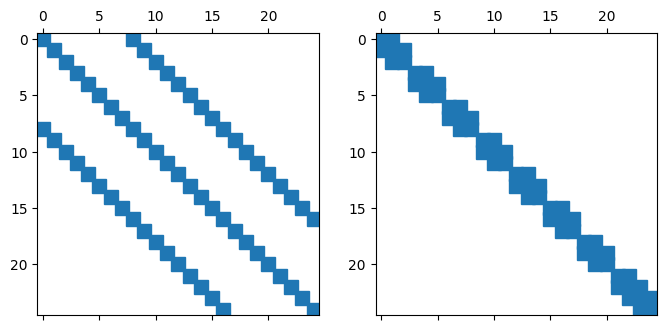

In [199]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.spy(A)
ax2.spy(A_perm);

### <a id='toc1_4_2_'></a>[Problem wartości własnych](#toc0_)

In [66]:
# Find four the largest eigenvalues and corresponding eigenvectors
N = 10
A = sp.diags([1, -2, 1], [1, 0, -1], shape=[N, N], format='csc')
evals, evecs = sp.linalg.eigs(A, k=4, which='LM')
evals

array([-3.91898595+0.j, -3.68250707+0.j, -3.30972147+0.j, -2.83083003+0.j])

In [67]:
# Find four eigenvalues with the smallest real part and corresponding eigenvectors
evals, evecs = sp.linalg.eigs(A, k=4, which='SR')
evals

array([-3.91898595+0.j, -2.83083003+0.j, -3.68250707+0.j, -3.30972147+0.j])

## <a id='toc1_5_'></a>[Grafy](#toc0_)

In [68]:
g = nx.MultiGraph()

In [69]:
g.add_node(1)

In [70]:
g.nodes()

NodeView((1,))

In [71]:
g.add_nodes_from([3, 4, 5])

In [72]:
g.nodes()

NodeView((1, 3, 4, 5))

In [73]:
g.add_edge(1, 2)

0

In [74]:
g.edges()

MultiEdgeDataView([(1, 2)])

In [75]:
g.add_edges_from([(3, 4), (5, 6)])

[0, 0]

In [76]:
g.edges()

MultiEdgeDataView([(1, 2), (3, 4), (5, 6)])

In [77]:
g.add_weighted_edges_from([(1, 3, 1.5), (3, 5, 2.5)])

In [78]:
g.edges()

MultiEdgeDataView([(1, 2), (1, 3), (3, 4), (3, 5), (5, 6)])

In [79]:
g.edges(data=True)

MultiEdgeDataView([(1, 2, {}), (1, 3, {'weight': 1.5}), (3, 4, {}), (3, 5, {'weight': 2.5}), (5, 6, {})])

In [80]:
g.add_weighted_edges_from([(6, 7, 1.5)])

In [81]:
g.nodes()

NodeView((1, 3, 4, 5, 2, 6, 7))

In [82]:
g.edges()

MultiEdgeDataView([(1, 2), (1, 3), (3, 4), (3, 5), (5, 6), (6, 7)])

### <a id='toc1_5_1_'></a>[Graf tokijskiego metra](#toc0_)

In [1]:
import numpy as np
import json

In [2]:
with open("../Dane/r10/tokyo-metro.json") as f:
    data = json.load(f)

In [4]:
data.keys()

dict_keys(['C', 'G', 'F', 'H', 'M', 'N', 'T', 'Y', 'Z'])

In [9]:
data["C"]

{'color': '#149848',
 'transfers': [['C3', 'F15'],
  ['C4', 'Z2'],
  ['C4', 'G2'],
  ['C7', 'M14'],
  ['C7', 'N6'],
  ['C7', 'G6'],
  ['C8', 'M15'],
  ['C8', 'H6'],
  ['C9', 'H7'],
  ['C9', 'Y18'],
  ['C11', 'T9'],
  ['C11', 'M18'],
  ['C11', 'Z8'],
  ['C12', 'M19'],
  ['C18', 'H21']],
 'travel_times': [['C1', 'C2', 2],
  ['C2', 'C3', 2],
  ['C3', 'C4', 1],
  ['C4', 'C5', 2],
  ['C5', 'C6', 2],
  ['C6', 'C7', 2],
  ['C7', 'C8', 1],
  ['C8', 'C9', 3],
  ['C9', 'C10', 1],
  ['C10', 'C11', 2],
  ['C11', 'C12', 2],
  ['C12', 'C13', 2],
  ['C13', 'C14', 2],
  ['C14', 'C15', 2],
  ['C15', 'C16', 2],
  ['C16', 'C17', 3],
  ['C17', 'C18', 3],
  ['C18', 'C19', 3]]}

In [10]:
# Create a graph from the data
g = nx.Graph()

for line in data.values():
    g.add_weighted_edges_from(line["travel_times"])
    g.add_edges_from(line["transfers"])

In [11]:
g.edges(data=True)

EdgeDataView([('C1', 'C2', {'weight': 2}), ('C2', 'C3', {'weight': 2}), ('C3', 'C4', {'weight': 1}), ('C3', 'F15', {}), ('C4', 'C5', {'weight': 2}), ('C4', 'Z2', {}), ('C4', 'G2', {}), ('C5', 'C6', {'weight': 2}), ('C6', 'C7', {'weight': 2}), ('C7', 'C8', {'weight': 1}), ('C7', 'M14', {}), ('C7', 'N6', {}), ('C7', 'G6', {}), ('C8', 'C9', {'weight': 3}), ('C8', 'M15', {}), ('C8', 'H6', {}), ('C9', 'C10', {'weight': 1}), ('C9', 'H7', {}), ('C9', 'Y18', {}), ('C10', 'C11', {'weight': 2}), ('C11', 'C12', {'weight': 2}), ('C11', 'T9', {}), ('C11', 'M18', {}), ('C11', 'Z8', {}), ('C12', 'C13', {'weight': 2}), ('C12', 'M19', {}), ('C13', 'C14', {'weight': 2}), ('C14', 'C15', {'weight': 2}), ('C15', 'C16', {'weight': 2}), ('C16', 'C17', {'weight': 3}), ('C17', 'C18', {'weight': 3}), ('C18', 'C19', {'weight': 3}), ('C18', 'H21', {}), ('F15', 'F14', {'weight': 2}), ('F15', 'F16', {'weight': 2}), ('Z2', 'G2', {}), ('Z2', 'Z1', {'weight': 3}), ('Z2', 'Z3', {'weight': 2}), ('G2', 'G1', {'weight': 2

In [12]:
# Set the transfer attribute to True for edges that do not have a weight attribute
for n1, n2 in g.edges():
    g[n1][n2]["transfer"] = "weight" not in g[n1][n2]

In [13]:
g.edges(data=True)

EdgeDataView([('C1', 'C2', {'weight': 2, 'transfer': False}), ('C2', 'C3', {'weight': 2, 'transfer': False}), ('C3', 'C4', {'weight': 1, 'transfer': False}), ('C3', 'F15', {'transfer': True}), ('C4', 'C5', {'weight': 2, 'transfer': False}), ('C4', 'Z2', {'transfer': True}), ('C4', 'G2', {'transfer': True}), ('C5', 'C6', {'weight': 2, 'transfer': False}), ('C6', 'C7', {'weight': 2, 'transfer': False}), ('C7', 'C8', {'weight': 1, 'transfer': False}), ('C7', 'M14', {'transfer': True}), ('C7', 'N6', {'transfer': True}), ('C7', 'G6', {'transfer': True}), ('C8', 'C9', {'weight': 3, 'transfer': False}), ('C8', 'M15', {'transfer': True}), ('C8', 'H6', {'transfer': True}), ('C9', 'C10', {'weight': 1, 'transfer': False}), ('C9', 'H7', {'transfer': True}), ('C9', 'Y18', {'transfer': True}), ('C10', 'C11', {'weight': 2, 'transfer': False}), ('C11', 'C12', {'weight': 2, 'transfer': False}), ('C11', 'T9', {'transfer': True}), ('C11', 'M18', {'transfer': True}), ('C11', 'Z8', {'transfer': True}), ('C

In [14]:
g.number_of_nodes(), g.number_of_edges()

(184, 243)

In [15]:
# List of edges that represent a transfer
on_foot = [e for e in g.edges() if g.get_edge_data(*e)["transfer"]]

In [16]:
# List of edges that represent a travel time
on_train = [e for e in g.edges() if not g.get_edge_data(*e)["transfer"]]

In [17]:
g.nodes()

NodeView(('C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'F15', 'Z2', 'G2', 'M14', 'N6', 'G6', 'M15', 'H6', 'H7', 'Y18', 'T9', 'M18', 'Z8', 'M19', 'H21', 'G1', 'G3', 'G4', 'G5', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', 'G19', 'Z1', 'F16', 'Z3', 'M13', 'Y16', 'Z4', 'N7', 'M16', 'H8', 'T10', 'Z9', 'H16', 'H17', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'F13', 'F14', 'Y1', 'Y2', 'Y3', 'Y4', 'Y5', 'Y6', 'Y7', 'Y8', 'Y9', 'M25', 'M9', 'H1', 'H2', 'H3', 'H4', 'H5', 'H9', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H18', 'H19', 'H20', 'T11', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M10', 'M11', 'M12', 'M17', 'M20', 'M21', 'M22', 'M23', 'M24', 'm3', 'm4', 'm5', 'N8', 'N11', 'N1', 'N2', 'N3', 'N4', 'N5', 'N9', 'N10', 'N12', 'N13', 'N14', 'N15', 'N16', 'N17', 'N18', 'N19', 'T1', 'T2', 'T3', 'Y14', 'Y13', 'T6', 'T4', 'T5', 'T7', 'T8', 'T12', 

In [18]:
# Set the color attribute for each metro line
colors = [data[n[0].upper()]["color"] for n in g.nodes()]

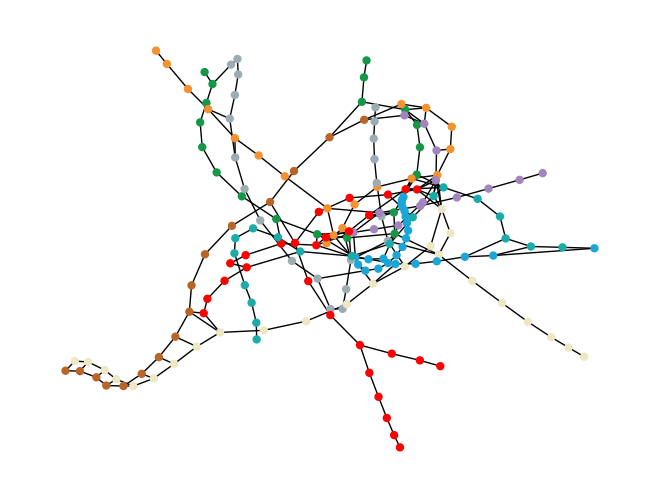

In [32]:
nx.draw(g, node_size=25, node_color=colors)

In [33]:
g.degree()

DegreeView({'C1': 1, 'C2': 2, 'C3': 3, 'C4': 4, 'C5': 2, 'C6': 2, 'C7': 5, 'C8': 4, 'C9': 4, 'C10': 2, 'C11': 5, 'C12': 3, 'C13': 2, 'C14': 2, 'C15': 2, 'C16': 2, 'C17': 2, 'C18': 3, 'C19': 1, 'F15': 3, 'Z2': 4, 'G2': 4, 'M14': 5, 'N6': 5, 'G6': 5, 'M15': 4, 'H6': 4, 'H7': 4, 'Y18': 4, 'T9': 5, 'M18': 5, 'Z8': 5, 'M19': 3, 'H21': 2, 'G1': 3, 'G3': 2, 'G4': 3, 'G5': 6, 'G7': 2, 'G8': 2, 'G9': 4, 'G10': 2, 'G11': 3, 'G12': 3, 'G13': 2, 'G14': 2, 'G15': 3, 'G16': 3, 'G17': 2, 'G18': 2, 'G19': 1, 'Z1': 3, 'F16': 3, 'Z3': 3, 'M13': 6, 'Y16': 6, 'Z4': 6, 'N7': 6, 'M16': 4, 'H8': 4, 'T10': 3, 'Z9': 3, 'H16': 3, 'H17': 3, 'F1': 2, 'F2': 3, 'F3': 3, 'F4': 3, 'F5': 3, 'F6': 3, 'F7': 3, 'F8': 3, 'F9': 4, 'F10': 2, 'F11': 2, 'F12': 2, 'F13': 3, 'F14': 2, 'Y1': 2, 'Y2': 3, 'Y3': 3, 'Y4': 3, 'Y5': 3, 'Y6': 3, 'Y7': 3, 'Y8': 3, 'Y9': 4, 'M25': 3, 'M9': 3, 'H1': 1, 'H2': 2, 'H3': 2, 'H4': 2, 'H5': 2, 'H9': 2, 'H10': 2, 'H11': 2, 'H12': 3, 'H13': 2, 'H14': 2, 'H15': 2, 'H18': 2, 'H19': 2, 'H20': 2, 'T1

In [34]:
d_max = max(d for (n, d) in g.degree())
[(n, d) for (n, d) in g.degree() if d == d_max]

[('G5', 6), ('M13', 6), ('Y16', 6), ('Z4', 6), ('N7', 6)]

In [35]:
p = nx.shortest_path(g, "Y24", "C19")
np.array(p)

array(['Y24', 'Y23', 'Y22', 'Y21', 'Y20', 'Y19', 'Y18', 'C9', 'C10',
       'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19'],
      dtype='<U3')

In [36]:
import scipy.sparse as sp
import networkx as nx

A = nx.to_scipy_sparse_array(g)
A

<184x184 sparse array of type '<class 'numpy.intc'>'
	with 486 stored elements in Compressed Sparse Row format>

In [37]:
perm = sp.csgraph.reverse_cuthill_mckee(A)
M, N = A.shape
P = sp.coo_matrix((np.ones(M), (perm, np.arange(N)))).tocsr()
A_perm = P.T * A * P

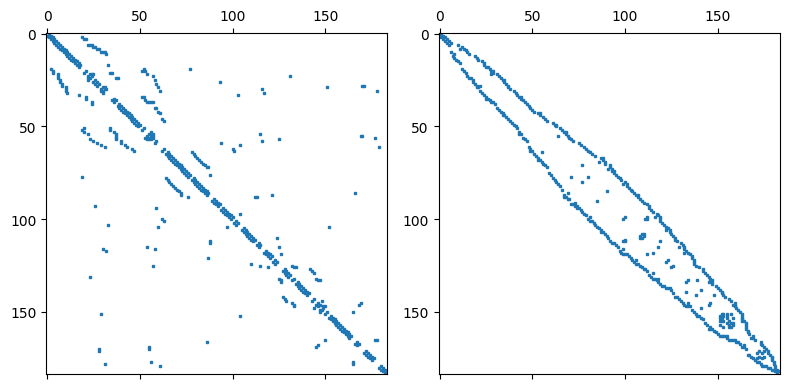

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.spy(A, markersize=2)
ax2.spy(A_perm, markersize=2)
fig.tight_layout();